<a href="https://colab.research.google.com/github/noorulghousiah/Sentiment-Classification-in-Text/blob/main/NLP_ClassificationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SENTIMENT CLASSIFICATION IN TEXT**

#**Environment Set-Up**

###**install requirements**

In [ ]:
# Uninstall existing versions to avoid conflicts
!pip uninstall -y numpy torch

# Install compatible versions
!pip install numpy==1.23.5

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 56.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.14.0 requires torch>=1.13.0, which is not installed.
torchvision 0.20.1+cu121 requires torch==2.5.1, which is not installed.
accelerate 1.2.1 requires torch>=1.10.0, which is not installed.
timm 1.0.13 requires torch, which is not installed.
fastai 2.7.18 requires torch<2.6,>=1.10, which is not installed.
jax 0.4.33 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.19 requires numpy

In [ ]:
!pip install torch==1.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.2/890.2 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.20.1+cu121 requires torch==2.5.1, but you have torch 1.13.0 which is incompatible.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 1.13.0 which is incompatible.


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
bigframes 1.31.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.


In [ ]:
!git clone https://github.com/nlp-with-transformers/notebooks.git
%cd notebooks
from install import *
install_requirements(is_chapter2=True)

Cloning into 'notebooks'...
remote: Enumerating objects: 530, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 530 (delta 184), reused 162 (delta 162), pack-reused 321 (from 2)
Receiving objects: 100% (530/530), 28.52 MiB | 15.87 MiB/s, done.
Resolving deltas: 100% (253/253), done.
/content/notebooks
⏳ Installing base requirements ...
✅ Base requirements installed!
⏳ Installing Git LFS ...
✅ Git LFS installed!


In [ ]:
from utils import *
setup_chapter()

Using transformers v4.16.2
Using datasets v1.16.1


#**Dataset**

Credit:


*   The dataset used is "emotion-train-split" from Hugging Face :
https://huggingface.co/datasets/transformersbook/emotion-train-split


*   E. Saravia et al., "CARER: Contextualized Affect Representations for Emotion Recognition," Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing (Oct–Nov 2018): 3687–3697, http://dx.doi.org/10.18653/v1/D18-1404.








###**Get Dataset**

In [ ]:
from datasets import Dataset, DatasetDict, ClassLabel, Features, Value
import pandas as pd

# Dataset URL
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"

# Load the dataset manually with pandas
df = pd.read_csv(dataset_url, sep=";", names=["text", "label"], header=None)

# Define the emotion labels manually
label_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
label_class = ClassLabel(names=label_names)

# Map the string labels to corresponding integer labels
df['label'] = df['label'].map({name: idx for idx, name in enumerate(label_names)})

# Define the features explicitly using the Features class
features = Features({
    "text": Value(dtype="string"),
    "label": label_class
})

# Convert to Hugging Face Dataset with the correct features
full_dataset = Dataset.from_pandas(df, features=features)

# Split dataset into train, validation, and test (80%, 10%, 10%)
train_test_split = full_dataset.train_test_split(test_size=0.2, seed=42)
validation_test_split = train_test_split["test"].train_test_split(test_size=0.5, seed=42)

# Combine splits into a single DatasetDict
split_datasets = DatasetDict({
    "train": train_test_split["train"],
    "validation": validation_test_split["train"],
    "test": validation_test_split["test"]
})


emotions = split_datasets

# Inspect the resulting splits and features
print(emotions)
print(emotions['train'].features)


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 12800
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
})
{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6,
names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None,
id=None)}


In [ ]:
#--------------------------------------
# This is not important
# These are just notes on how to access the data
# study dataset structure
#-------------------------------------
emotions
train_ds = emotions["train"]
train_ds
len(train_ds)
train_ds[0]
train_ds.column_names
print(train_ds.features)
print(train_ds[:5])
print(train_ds["text"][:5])

{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6,
names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None,
id=None)}
{'text': ['i feel like god has been gracious in answering prayers', 'i should go
to sleep but i m feeling reluctant to let go of the day', 'i feel all slutty for
some reason oh wait i know ive had like guys talk to me about sex and stuff one
guy dave was like', 'i do my yoga i open up feel tender two hours later i m
nicely swaddled up again happily wrapping layer upon layer over it out of my
well meaning habit', 'i can still remember what it was like to be a teenager and
that giddy feeling of amazement when the hot looking boy you like although we
didn t use the term hot back then actually likes you back'], 'label': [1, 4, 2,
2, 2]}
['i feel like god has been gracious in answering prayers', 'i should go to sleep
but i m feeling reluctant to let go of the day', 'i feel all slutty for some
reason oh wait i know ive had like 

###**Check Dataset Distributions**

In [ ]:
#--------------------------------------------------------------------
# convert dataset "object" to pandas "dataframe" for dataset analysis
#----------------------------------------------------------------------
import pandas as pd

# Set the format to pandas
emotions.set_format(type="pandas")

# Convert to pandas DataFrame
df = emotions["train"][:]

# Convert integer labels to string labels
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)

# Display the next five rows (rows 6 to 10)
#df.head()
df.iloc[5:10]


,text,label,label_name
5,i feel a bit tortured right now,4,fear
6,im feeling very uncomfortable there the comfor...,4,fear
7,i remember feeling embarrassed that not only s...,0,sadness
8,im feeling angry i think i strop about rufflin...,3,anger
9,i was rather calm after writing down how i tru...,3,anger


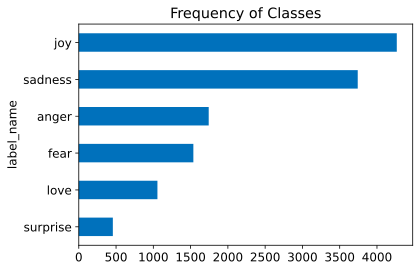

In [ ]:
# Distribution of Class
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

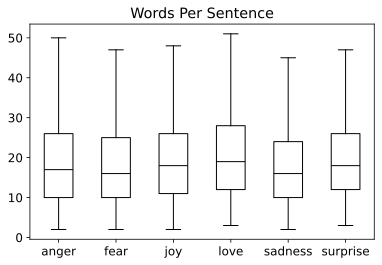

In [ ]:
#--------------------------------------------------------
# For DistilBERT, the maximum context size is 512 tokens
# So, this is to check that our text does not exceed that
#--------------------------------------------------------
df["Words Per Sentence"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Sentence", by="label_name", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
#----------------------------------------------------
# So we done with analysis, we convert back dataset
# convert pandas "dataframe" back to dataset "object"
#----------------------------------------------------
emotions.reset_format()
print(emotions)
print(emotions['train'].features)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 12800
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
})
{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6,
names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None,
id=None)}


#**Pre-processing**

##**Prepare model and data**

####**Vectorization**

In [ ]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
# Applies the tokenizer; padding=True will pad the output with zeros to the size of the longest one in a batch, truncation=True will truncate the output to the model's maximum context size
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

####**Get Hidden States**

In [ ]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

In [ ]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

In [ ]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [ ]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/13 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
#------------------------------------------
# Just to check the what emotional_hidden have
#-----------------------------------------
print(emotions_hidden["train"].column_names)
print(emotions_hidden)

['attention_mask', 'hidden_state', 'input_ids', 'label', 'text']
DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'hidden_state', 'input_ids', 'label',
'text'],
        num_rows: 12800
    })
    validation: Dataset({
        features: ['attention_mask', 'hidden_state', 'input_ids', 'label',
'text'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['attention_mask', 'hidden_state', 'input_ids', 'label',
'text'],
        num_rows: 1600
    })
})


####**Dependent (Y) and Independent (X) Data**

In [ ]:
#------------------------------------------
# Prepare Independent (X) and Dependent (Y) Data for Training and Validation
#-----------------------------------------
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((12800, 768), (1600, 768))

In [ ]:
#------------------------------------------
# Since when we check data distribution before,
# the dataset is not uniform, like happiness is a lot more compared to love
# so, we do oversampling so increase the dataset of other minority category as well
# This is done ONLY on TRAINING DATA
#-----------------------------------------

from imblearn.over_sampling import SMOTE


# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

##**Visualisation of the Prepare Dataset to Feed into Model**

In [ ]:
#------------------------------------------------------------------
# Nothing important
# This is just for show how our dataset look like now
# This data will be fed as input to the classification model later
#--------------------------------------------------------------

from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,-0.487036,3.692987,1
1,-2.005176,-0.274307,4
2,4.228335,-1.288234,2
3,2.361096,-0.870052,2
4,2.916193,-0.446434,2


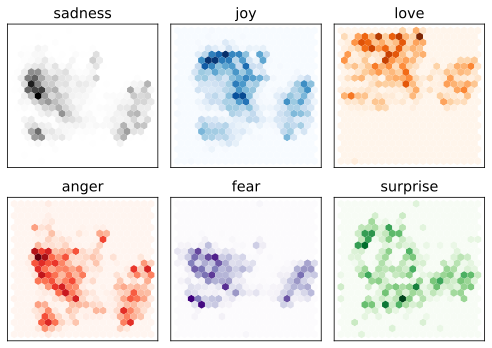

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

#**Training**

In [ ]:
# We increase `max_iter` to guarantee convergence
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [ ]:
# Save logistic regression model.
# Optional - so next time, dont need to train again, just need to use uploaded model
import pickle
from google.colab import files

with open('logistic_reg_model.pkl', 'wb') as f:
    pickle.dump(lr_clf, f)
files.download('logistic_reg_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# This code if use uploaded model saved/downloaded before
# uncomment if want to use
#import pickle
#from google.colab import files
#with open('/content/logistic_reg_model.pkl', 'rb') as f:
#  lr_clf = pickle.load(f)

#**Evaluation**

In [ ]:
# Represents the accuracy of OUR model, i.e., the proportion of correctly classified instances in the validation dataset.

lr_clf.score(X_valid, y_valid)

0.57625

In [ ]:
# Represents the accuracy of DUMMY simple baseline model.
# This score serves as a benchmark, showing how much better a our model performs
# compared to a basic model that simply predicts the most common label.

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.28375

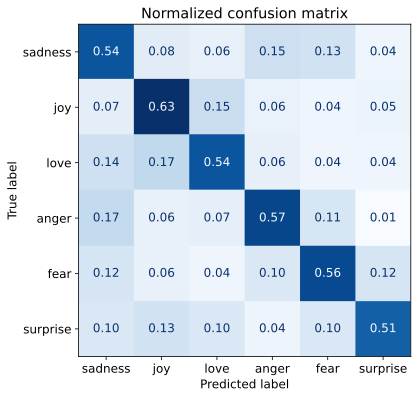

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

#**Real-Time Classification**

In [ ]:
def classify_text(user_input):
    # Tokenize the user input
    encoded_input = tokenizer(
        user_input,
        padding="max_length",
        truncation=True,
        max_length=tokenizer.model_max_length,
        return_tensors="pt"
    )

    # Place inputs on the same device as the model
    inputs = {k: v.to(device) for k, v in encoded_input.items()}

    # Extract the hidden state for the [CLS] token
    with torch.no_grad():
        hidden_state = model(**inputs).last_hidden_state[:, 0].cpu().numpy()

    # Predict the emotion
    predicted_label = int(lr_clf.predict(hidden_state)[0])  # Ensure the label is an integer

    # Convert the label index to the corresponding emotion string
    emotion = emotions_encoded["train"].features["label"].int2str(predicted_label)

    return emotion


#---------------------------------------------------------------------
# TO TEST, CHANGE SENTENCE IN USER_INPUT BELOW, THEN RUN THE CELL
#--------------------------------------------------------------------
#Inputs are taken from "Acquainted with the Night by Robert Frost" and "Mr. Nobody By Anonymous"
#user_input = "I have been one acquainted with the night. I have walked out in rain and back in rain.I have outwalked the furthest city light I have looked down the saddest city lane. I have passed by the watchman on his beat And dropped my eyes, unwilling to explain. I have stood still and stopped the sound of feet When far away an interrupted cry Came over houses from another street, But not to call me back or say good-bye; And further still at an unearthly height, One luminary clock against the sky Proclaimed the time was neither wrong nor right. I have been one acquainted with the night."
user_input = "I know a funny little man, As quiet as a mouse, Who does the mischief that is done In everybody’s house! There’s no one ever sees his face, And yet we all agree That every plate we break was cracked By Mr. Nobody. ’Tis he who always tears out books, Who leaves the door ajar, He pulls the buttons from our shirts, And scatters pins afar; That squeaking door will always squeak, For prithee, don’t you see, We leave the oiling to be done By Mr. Nobody. He puts damp wood upon the fire That kettles cannot boil; His are the feet that bring in mud, And all the carpets soil. The papers always are mislaid; Who had them last, but he? There’s no one tosses them about But Mr. Nobody. The finger marks upon the door By none of us are made; We never leave the blinds unclosed, To let the curtains fade. The ink we never spill; the boots That lying round you see Are not our boots,—they all belong To Mr. Nobody."

predicted_emotion = classify_text(user_input)
print(f"Predicted Emotion for sentence [{user_input}]: {predicted_emotion}")



Predicted Emotion for sentence [I know a funny little man, As quiet as a mouse,
Who does the mischief that is done In everybody’s house! There’s no one ever
sees his face, And yet we all agree That every plate we break was cracked By Mr.
Nobody. ’Tis he who always tears out books, Who leaves the door ajar, He pulls
the buttons from our shirts, And scatters pins afar; That squeaking door will
always squeak, For prithee, don’t you see, We leave the oiling to be done By Mr.
Nobody. He puts damp wood upon the fire That kettles cannot boil; His are the
feet that bring in mud, And all the carpets soil. The papers always are mislaid;
Who had them last, but he? There’s no one tosses them about But Mr. Nobody. The
finger marks upon the door By none of us are made; We never leave the blinds
unclosed, To let the curtains fade. The ink we never spill; the boots That lying
round you see Are not our boots,—they all belong To Mr. Nobody.]: joy
